In [72]:
Data = "/home/doug/Desktop/Projecrs/Stock-Prediction/Data_for_Analysis/PLTR.csv"

In [73]:
import pandas as pd

In [74]:
df= pd.read_csv(Data)


In [75]:
df.head(100)

,Date,Open,High,Low,Close,Volume
0,2020-09-30,10.00,11.42,9.110,9.50,338584433
1,2020-10-01,9.69,10.10,9.230,9.46,124297587
2,2020-10-02,9.06,9.28,8.940,9.20,55018343
3,2020-10-05,9.43,9.49,8.920,9.03,36316878
4,2020-10-06,9.04,10.18,8.900,9.90,90864039
...,...,...,...,...,...,...
95,2021-02-17,27.99,29.73,27.000,27.08,151007022
96,2021-02-18,24.99,26.31,24.500,25.17,313175121
97,2021-02-19,27.02,29.96,26.900,29.00,320063732
98,2021-02-22,29.96,30.19,27.536,28.00,183049487


<Axes: title={'center': 'PLTR Open and Close Prices Over Time'}, xlabel='Date'>

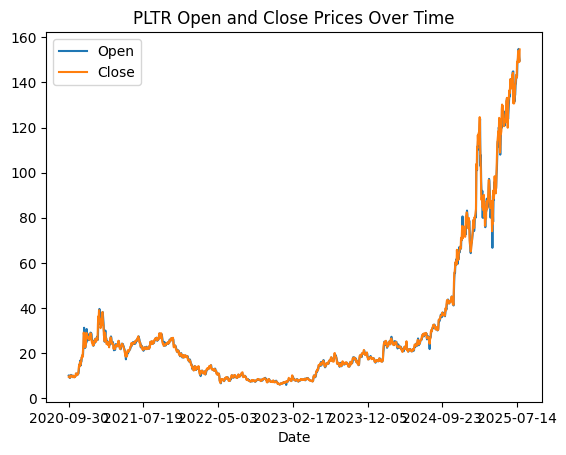

In [76]:
df.plot(x="Date", y=["Open", "Close"], kind="line", title="PLTR Open and Close Prices Over Time")

In [77]:
df=df[['Date','Open','Close']]


In [78]:
df['Date']

0       2020-09-30
1       2020-10-01
2       2020-10-02
3       2020-10-05
4       2020-10-06
           ...    
1203    2025-07-17
1204    2025-07-18
1205    2025-07-21
1206    2025-07-22
1207    2025-07-23
Name: Date, Length: 1208, dtype: object

In [79]:
##Converting date column to datetime format for feasible operations.

import datetime
df['Date'] = pd.to_datetime(df['Date']) 


/tmp/ipykernel_2959074/1543661816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [80]:
df['Date']

0      2020-09-30
1      2020-10-01
2      2020-10-02
3      2020-10-05
4      2020-10-06
          ...    
1203   2025-07-17
1204   2025-07-18
1205   2025-07-21
1206   2025-07-22
1207   2025-07-23
Name: Date, Length: 1208, dtype: datetime64[ns]

In [81]:
#converting datecolumn to index. (removing the index column to make date as index)

df.index= df.pop('Date')
df 

,Open,Close
Date,,
2020-09-30,10.00,9.50
2020-10-01,9.69,9.46
2020-10-02,9.06,9.20
2020-10-05,9.43,9.03
2020-10-06,9.04,9.90
...,...,...
2025-07-17,151.56,153.99
2025-07-18,154.86,153.52
2025-07-21,153.88,151.79


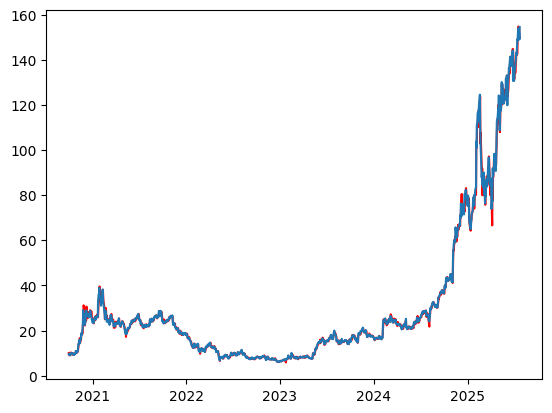

In [82]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Open'], label='Opening Price', color='Red')
plt.plot(df.index, df['Close'], label='Closing Price')

In [83]:
df

,Open,Close
Date,,
2020-09-30,10.00,9.50
2020-10-01,9.69,9.46
2020-10-02,9.06,9.20
2020-10-05,9.43,9.03
2020-10-06,9.04,9.90
...,...,...
2025-07-17,151.56,153.99
2025-07-18,154.86,153.52
2025-07-21,153.88,151.79


In [84]:
import numpy as np


In [88]:
def df_to_windowed_df(dataframe, firstdatestr, lastdatestr, n=3):
    first_date = pd.to_datetime(firstdatestr)
    last_date = pd.to_datetime(lastdatestr)
    dates, X, Y = [], [], []

    # Ensure index is datetime and sorted
    dataframe = dataframe.sort_index()
    if not isinstance(dataframe.index, pd.DatetimeIndex):
        dataframe.index = pd.to_datetime(dataframe.index)

    # Get all dates in range
    all_dates = dataframe.loc[first_date:last_date].index

    for target_date in all_dates:
        df_subset = dataframe.loc[:target_date].tail(n+1)
        if len(df_subset) != n+1:
            continue  # skip if not enough data
        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]
        dates.append(target_date)
        X.append(x)
        Y.append(y)

    ret_df = pd.DataFrame({'Date': dates})
    X = np.array(X)
    for i in range(n):
        ret_df[f'Target-{n-i}'] = X[:, i]
    ret_df['Target'] = Y
    return ret_df

windowed_df = df_to_windowed_df(df, '2020-10-05', '2025-07-18', n=3)
windowed_df

,Date,Target-3,Target-2,Target-1,Target
0,2020-10-05,9.50,9.46,9.20,9.03
1,2020-10-06,9.46,9.20,9.03,9.90
2,2020-10-07,9.20,9.03,9.90,10.00
3,2020-10-08,9.03,9.90,10.00,10.00
4,2020-10-09,9.90,10.00,10.00,9.95
...,...,...,...,...,...
1197,2025-07-14,143.13,142.50,142.10,149.15
1198,2025-07-15,142.50,142.10,149.15,148.58
1199,2025-07-16,142.10,149.15,148.58,150.91
1200,2025-07-17,149.15,148.58,150.91,153.99


In [ ]:
df2= pd.read_csv(Data)
df2=df2[['Date','High','Low','Open','Close']]
df2['Date']=pd.to_datetime(df2['Date'])
df2.index= df2.pop('Date')
df2





,High,Low,Open,Close
Date,,,,
2020-09-30,11.4200,9.1100,10.00,9.50
2020-10-01,10.1000,9.2300,9.69,9.46
2020-10-02,9.2800,8.9400,9.06,9.20
2020-10-05,9.4900,8.9200,9.43,9.03
2020-10-06,10.1800,8.9000,9.04,9.90
...,...,...,...,...
2025-07-17,155.6800,150.8200,151.56,153.99
2025-07-18,154.9200,151.9000,154.86,153.52
2025-07-21,155.4400,151.3600,153.88,151.79


<BarContainer object of 1208 artists>

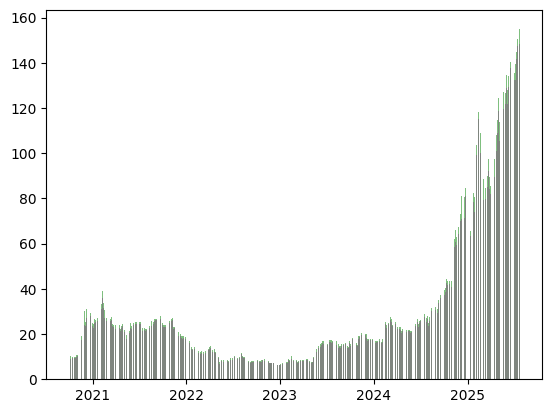

In [120]:
#plt.plot(df2.index, df2['Open'], label='Opening Price', color='Red')
plt.bar(df2.index, df2['High'], label='Highest Price', color='Green', alpha=0.5)
#plt.plot(df2.index, df2['Close'], label='Closing Price', color='Blue', marker='.')
plt.bar(df2.index, df2['Low'], label='Lowest Price', color='Purple',alpha=0.3)

In [121]:
def df_to_windowed_df_multi(dataframe, firstdatestr, lastdatestr, n=3):
    first_date = pd.to_datetime(firstdatestr)
    last_date = pd.to_datetime(lastdatestr)
    dates, X, Y = [], [], []

    dataframe = dataframe.sort_index()
    if not isinstance(dataframe.index, pd.DatetimeIndex):
        dataframe.index = pd.to_datetime(dataframe.index)

    features = ['Open', 'High', 'Low', 'Close']
    all_dates = dataframe.loc[first_date:last_date].index

    for target_date in all_dates:
        df_subset = dataframe.loc[:target_date].tail(n+1)
        if len(df_subset) != n+1:
            continue
        # Previous n days' features, flattened
        x = df_subset[features].iloc[:-1].to_numpy().flatten()
        # Present day's targets
        y = df_subset[features].iloc[-1].to_numpy()
        dates.append(target_date)
        X.append(x)
        Y.append(y)

    X = np.array(X)
    Y = np.array(Y)
    ret_df = pd.DataFrame({'Date': dates})
    # Add feature columns
    for i in range(n):
        for j, feat in enumerate(features):
            ret_df[f'{feat}-{n-i}'] = X[:, i*len(features)+j]
    # Add target columns
    for j, feat in enumerate(features):
        ret_df[f'Target_{feat}'] = Y[:, j]
    return ret_df

# Usage:

windowed_df_multi = df_to_windowed_df_multi(df2, '2020-09-30', '2025-07-23', n=3)
windowed_df_multi

,Date,Open-3,High-3,Low-3,Close-3,Open-2,High-2,Low-2,Close-2,Open-1,High-1,Low-1,Close-1,Target_Open,Target_High,Target_Low,Target_Close
0,2020-10-05,10.00,11.420,9.1100,9.50,9.69,10.10,9.2300,9.46,9.06,9.2800,8.9400,9.20,9.43,9.4900,8.9200,9.03
1,2020-10-06,9.69,10.100,9.2300,9.46,9.06,9.28,8.9400,9.20,9.43,9.4900,8.9200,9.03,9.04,10.1800,8.9000,9.90
2,2020-10-07,9.06,9.280,8.9400,9.20,9.43,9.49,8.9200,9.03,9.04,10.1800,8.9000,9.90,10.04,10.4900,9.9900,10.00
3,2020-10-08,9.43,9.490,8.9200,9.03,9.04,10.18,8.9000,9.90,10.04,10.4900,9.9900,10.00,10.29,10.4000,9.9900,10.00
4,2020-10-09,9.04,10.180,8.9000,9.90,10.04,10.49,9.9900,10.00,10.29,10.4000,9.9900,10.00,10.13,10.1900,9.8900,9.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2025-07-17,142.72,149.575,142.2200,149.15,148.93,150.62,147.3601,148.58,149.30,151.5100,147.6744,150.91,151.56,155.6800,150.8200,153.99
1201,2025-07-18,148.93,150.620,147.3601,148.58,149.30,151.51,147.6744,150.91,151.56,155.6800,150.8200,153.99,154.86,154.9200,151.9000,153.52
1202,2025-07-21,149.30,151.510,147.6744,150.91,151.56,155.68,150.8200,153.99,154.86,154.9200,151.9000,153.52,153.88,155.4400,151.3600,151.79
1203,2025-07-22,151.56,155.680,150.8200,153.99,154.86,154.92,151.9000,153.52,153.88,155.4400,151.3600,151.79,150.85,151.7899,145.0620,149.07


In [124]:
new_check = df_to_windowed_df_multi(df2, '2020-09-30', '2025-07-23', 3)
new_check

,Date,Open-3,High-3,Low-3,Close-3,Open-2,High-2,Low-2,Close-2,Open-1,High-1,Low-1,Close-1,Target_Open,Target_High,Target_Low,Target_Close
0,2020-10-05,10.00,11.420,9.1100,9.50,9.69,10.10,9.2300,9.46,9.06,9.2800,8.9400,9.20,9.43,9.4900,8.9200,9.03
1,2020-10-06,9.69,10.100,9.2300,9.46,9.06,9.28,8.9400,9.20,9.43,9.4900,8.9200,9.03,9.04,10.1800,8.9000,9.90
2,2020-10-07,9.06,9.280,8.9400,9.20,9.43,9.49,8.9200,9.03,9.04,10.1800,8.9000,9.90,10.04,10.4900,9.9900,10.00
3,2020-10-08,9.43,9.490,8.9200,9.03,9.04,10.18,8.9000,9.90,10.04,10.4900,9.9900,10.00,10.29,10.4000,9.9900,10.00
4,2020-10-09,9.04,10.180,8.9000,9.90,10.04,10.49,9.9900,10.00,10.29,10.4000,9.9900,10.00,10.13,10.1900,9.8900,9.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2025-07-17,142.72,149.575,142.2200,149.15,148.93,150.62,147.3601,148.58,149.30,151.5100,147.6744,150.91,151.56,155.6800,150.8200,153.99
1201,2025-07-18,148.93,150.620,147.3601,148.58,149.30,151.51,147.6744,150.91,151.56,155.6800,150.8200,153.99,154.86,154.9200,151.9000,153.52
1202,2025-07-21,149.30,151.510,147.6744,150.91,151.56,155.68,150.8200,153.99,154.86,154.9200,151.9000,153.52,153.88,155.4400,151.3600,151.79
1203,2025-07-22,151.56,155.680,150.8200,153.99,154.86,154.92,151.9000,153.52,153.88,155.4400,151.3600,151.79,150.85,151.7899,145.0620,149.07


<BarContainer object of 1205 artists>

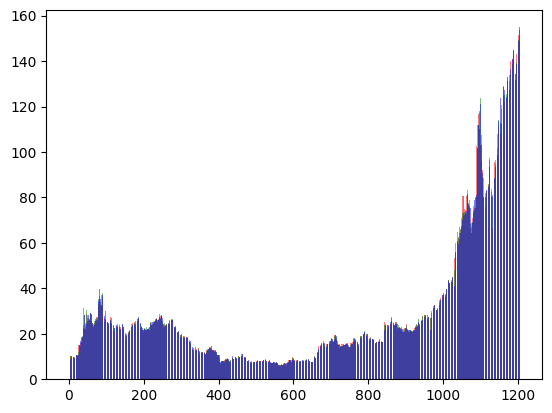

In [127]:
plt.bar(new_check.index, new_check['Open-1'], label='Opening Price', color='Red', alpha=0.5)
plt.bar(new_check.index, new_check['Open-2'], label='Opening Price', color='Green', alpha=0.5)
plt.bar(new_check.index, new_check['Open-3'], label='Opening Price', color='Blue', alpha=0.5)